In [1]:
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt 

In [2]:
tagsCSV = pd.read_csv("tags.csv")
moviesCSV = pd.read_csv("movies.csv")

In [5]:
popularTags = pd.merge(moviesCSV, tagsCSV, on='movieId', how='inner')
popularTags.timestamp = pd.to_datetime(popularTags.timestamp, infer_datetime_format=True)
popularTags.timestamp = popularTags.timestamp.dt.year
popularTags.sort_values(by='movieId', inplace=True)
print ("Number of  Null values: ", max(popularTags.isnull().sum()))
popularTags.head()

Number of  Null values:  0


,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1970
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1970
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1970
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1970
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1970


In [5]:
# convert to list
popularTags['genres'] = popularTags.genres.str.split('|')
# convert list of pd.Series then stack it
popularTags = (popularTags.set_index(['movieId','title','userId','tag','timestamp'])['genres']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_5', axis=1)
 .rename(columns={0:'genres'}))
popularTags.head()

,movieId,title,userId,tag,timestamp,genres
0,1,Toy Story (1995),336,pixar,1970,Adventure
1,1,Toy Story (1995),336,pixar,1970,Animation
2,1,Toy Story (1995),336,pixar,1970,Children
3,1,Toy Story (1995),336,pixar,1970,Comedy
4,1,Toy Story (1995),336,pixar,1970,Fantasy


In [34]:
popularTags[popularTags.genres == 'Drama']

,movieId,title,userId,tag,timestamp,genres
36,11,"American President, The (1995)",474,politics,1970,Drama
39,11,"American President, The (1995)",474,president,1970,Drama
41,14,Nixon (1995),474,president,1970,Drama
42,14,Nixon (1995),474,politics,1970,Drama
44,16,Casino (1995),474,Mafia,1970,Drama
45,17,Sense and Sensibility (1995),474,Jane Austen,1970,Drama
51,22,Copycat (1995),474,serial killer,1970,Drama
55,25,Leaving Las Vegas (1995),474,alcoholism,1970,Drama
57,26,Othello (1995),474,Shakespeare,1970,Drama
58,28,Persuasion (1995),474,In Netflix queue,1970,Drama


In [36]:
n=20
Drama = []
Drama = popularTags.tag.value_counts()[:n].index.tolist()
#print(Adventure)

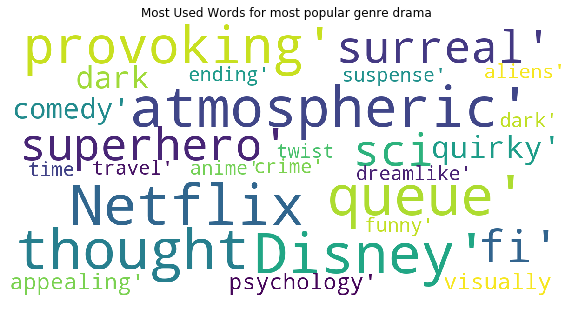

In [38]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=40)
        #fig.subplots_adjust(top=2.3)
    plt.title('Most Used Words for most popular genre drama')    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Drama)

In [39]:
popularTags[popularTags.genres == 'Comedy']

,movieId,title,userId,tag,timestamp,genres
3,1,Toy Story (1995),336,pixar,1970,Comedy
8,1,Toy Story (1995),474,pixar,1970,Comedy
13,1,Toy Story (1995),567,fun,1970,Comedy
27,3,Grumpier Old Men (1995),289,moldy,1970,Comedy
29,3,Grumpier Old Men (1995),289,old,1970,Comedy
31,5,Father of the Bride Part II (1995),474,pregnancy,1970,Comedy
32,5,Father of the Bride Part II (1995),474,remake,1970,Comedy
33,7,Sabrina (1995),474,remake,1970,Comedy
35,11,"American President, The (1995)",474,politics,1970,Comedy
38,11,"American President, The (1995)",474,president,1970,Comedy


In [40]:
n=20
Comedy = []
Comedy = popularTags.tag.value_counts()[:n].index.tolist()


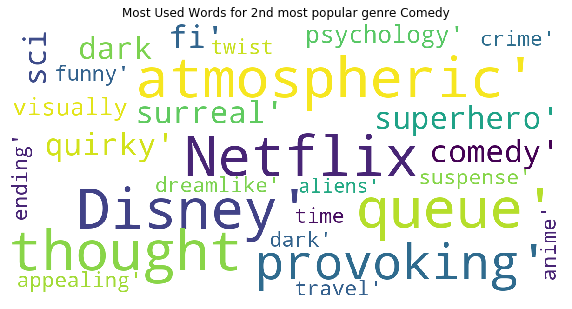

In [42]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=40)
        #fig.subplots_adjust(top=2.3)
    plt.title('Most Used Words for 2nd most popular genre Comedy')    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Drama)